In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [3]:
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
df.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
5,T1000006,249,S1,L3,R2,2018-01-01,1,Yes,39,34211.22
6,T1000007,248,S1,L1,R2,2018-01-01,1,Yes,40,35352.66
7,T1000008,247,S1,L1,R3,2018-01-01,1,Yes,64,52650.00
8,T1000009,246,S3,L1,R3,2018-01-01,1,Yes,62,42633.78
9,T1000010,254,S4,L1,R1,2018-01-01,1,Yes,87,62572.80


column Holiday, Discount harusnya type datanya boolean, Date column harusnya type datanya datetime. pada dataframe tersebut tidak ditemukan nilai yang kosong.

In [7]:
numericals = ['#Order', 'Sales', 'Holiday', 'Discount']
categoricals = ['Store_Type', 'Location_Type', 'Region_Code', 'Date']

In [8]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


adanya perbdaan yang signifikan median dengan max dengan masing masing columns. columns holiday, order dan sales memiliki outlier.

In [9]:
df[categoricals].describe()

,Store_Type,Location_Type,Region_Code,Date
count,188340,188340,188340,188340
unique,4,5,4,516
top,S1,L1,R1,2018-01-01
freq,88752,85140,63984,365


In [10]:
df['Store_Type'].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [11]:
df['Location_Type'].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [12]:
df['Region_Code'].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [13]:
df['Date'].value_counts()

2018-01-01    365
2018-11-20    365
2018-12-20    365
2018-12-19    365
2018-12-18    365
             ... 
2018-06-16    365
2018-06-15    365
2018-06-14    365
2018-06-13    365
2019-05-31    365
Name: Date, Length: 516, dtype: int64

In [14]:
df['Store_Type'].unique()

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [15]:
df['Location_Type'].unique()

array(['L3', 'L2', 'L1', 'L5', 'L4'], dtype=object)

In [16]:
df['Region_Code'].unique()

array(['R1', 'R4', 'R2', 'R3'], dtype=object)

TypeError: Vertical orientation requires numeric `y` variable.

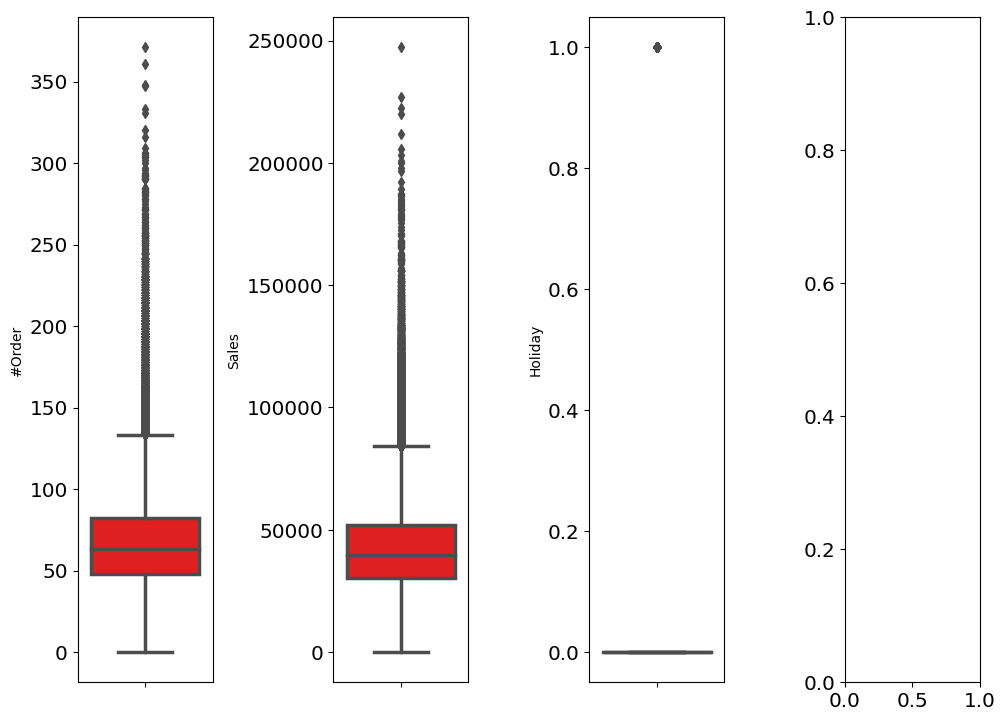

In [17]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red' , orient='v')
    plt.tight_layout()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

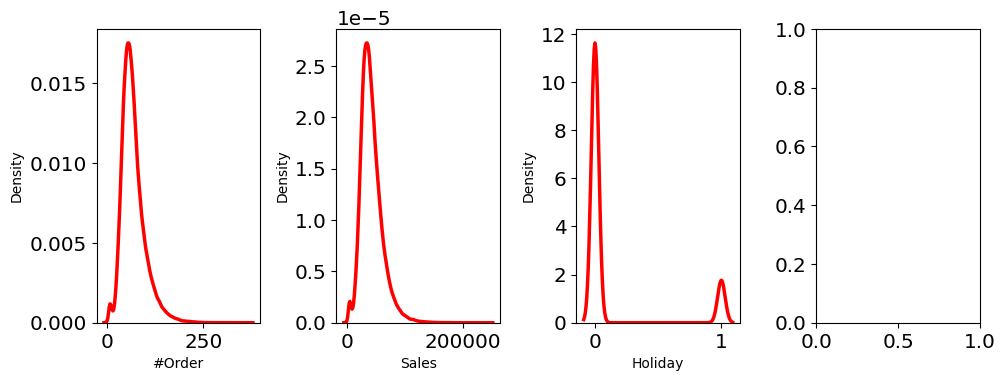

In [18]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout()

TypeError: Vertical orientation requires numeric `y` variable.

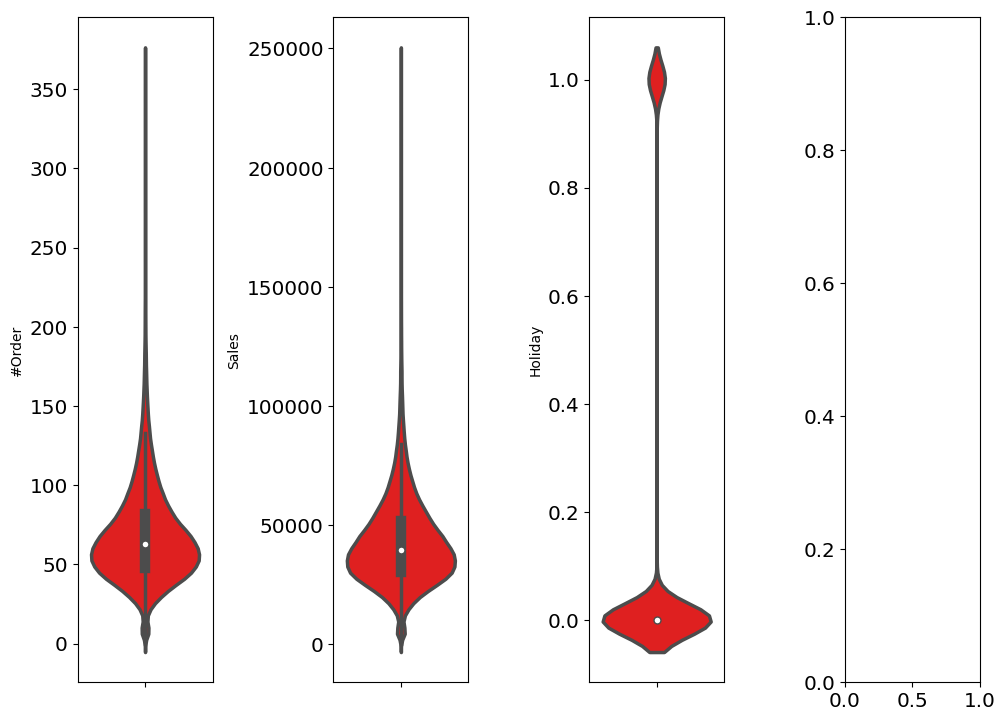

In [19]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y=df[features[i]], color='red' , orient='v')
    plt.tight_layout()

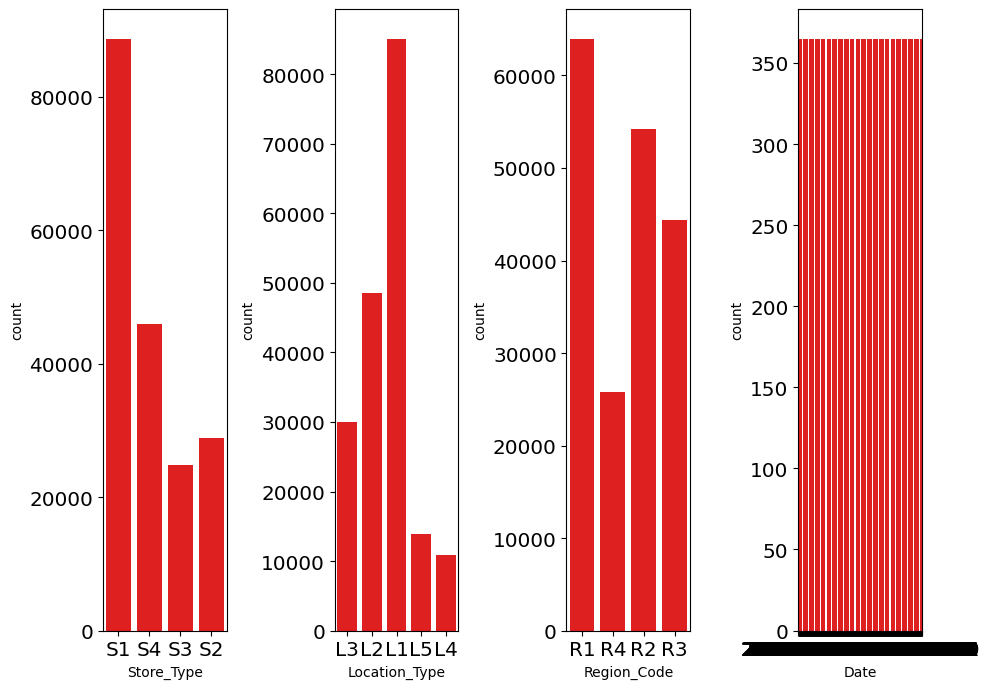

In [20]:
features = categoricals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color='red')
    plt.tight_layout()

feature date memiliki ketidakgunaan dalam proses pengembangan ML

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1568\3067869731.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

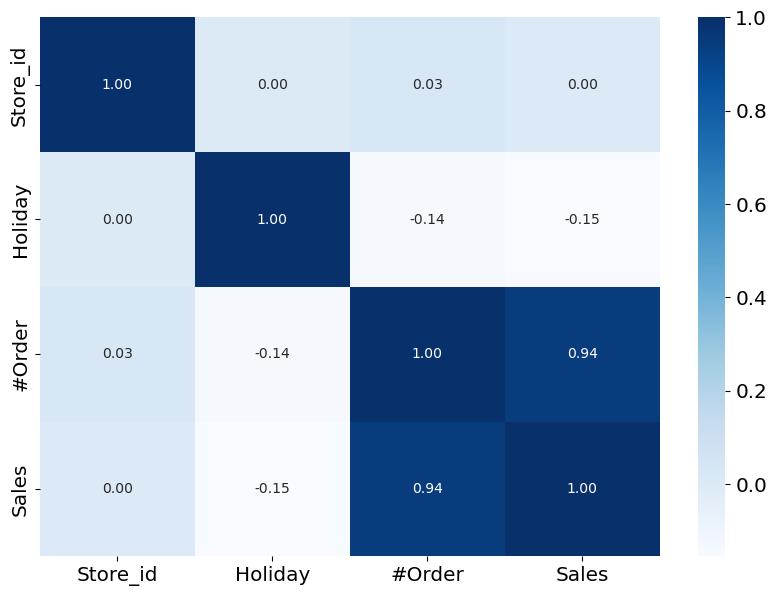

In [21]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

fetures order dan sales memiliki korelasi positif yang kuat. sedangkan sales dan holiday memiliki korelasi negatif

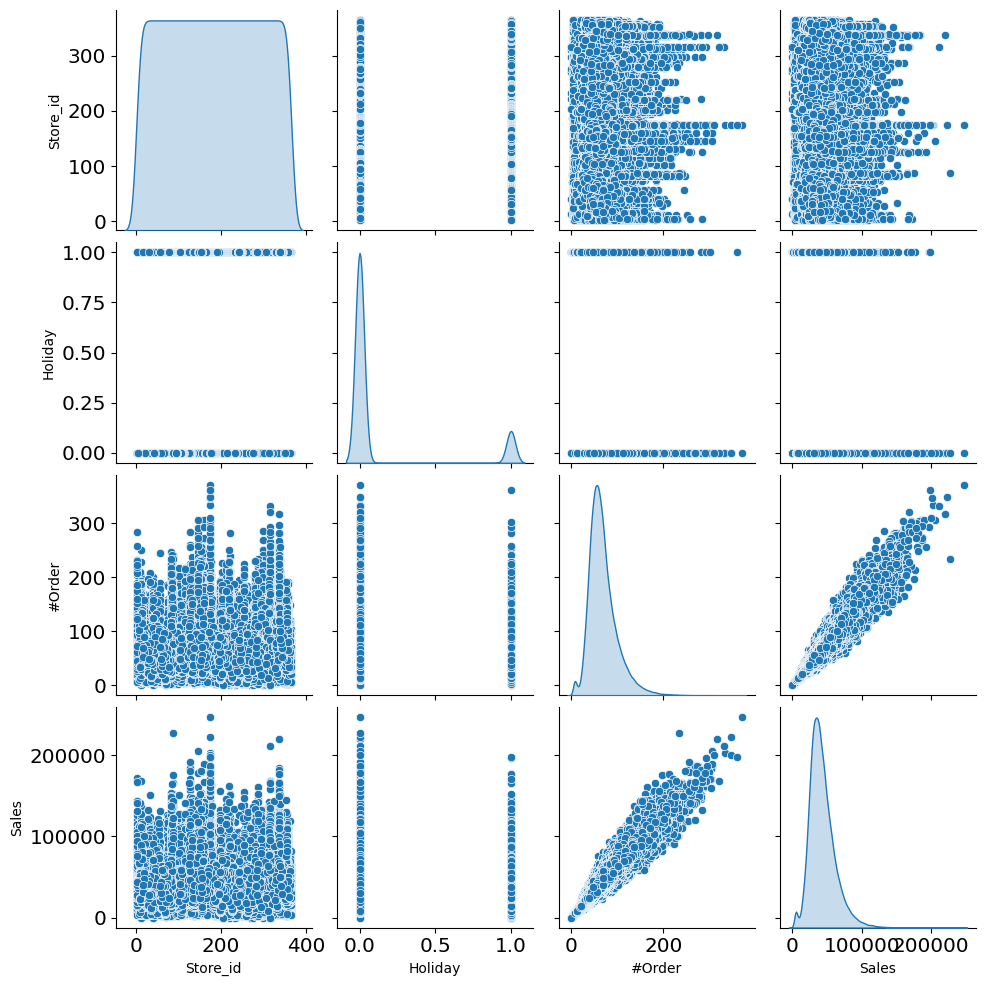

In [22]:
sns.pairplot(df, diag_kind='kde')

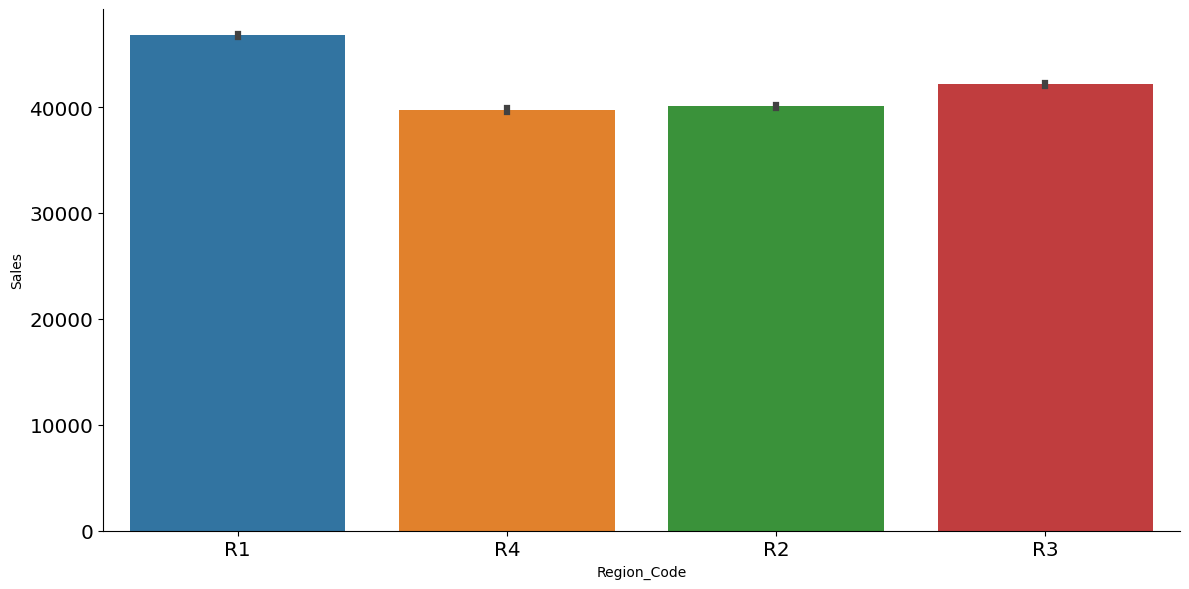

In [25]:
sns.catplot(x='Region_Code', y='Sales', data=df, kind='bar', height=6, aspect=2)
plt.show()